### IMPORTS

In [164]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [166]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            for j in range(arr_np.shape[0]):
                if j != i and is_pareto_efficient[j]:
                    # Check if arr[i] dominates arr[j] in all dimensions
                    if np.all(arr_np[i] <= arr_np[j]) and np.any(arr_np[i] < arr_np[j]):
                        is_pareto_efficient[j] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient
    

In [167]:
savefiles = [file for file in os.listdir("saves") if file != "pareto.csv"] 
savefiles

['saves_1710424156961.csv',
 'saves_1710424454746.csv',
 'saves_1710424515049.csv',
 'saves_1710424637019.csv',
 'saves_1710424916129.csv']

### VISUALIZATION

In [168]:
pareto = pd.read_csv('saves/pareto.csv', sep=';')
pareto

,utilA,utilB,utilSum,contract,pareto
0,2764,8461,11225,"[174,1,41,3,4,70,190,17,8,173,112,71,66,13,193...",True
1,2726,8515,11241,"[174,1,41,3,4,70,190,17,8,173,112,71,66,13,193...",True
2,2795,8448,11243,"[174,1,41,3,4,70,190,17,8,173,112,71,66,13,193...",True
3,2817,8431,11248,"[174,1,41,3,4,70,190,17,8,173,112,71,66,13,193...",True
4,2758,8492,11250,"[174,1,41,3,4,70,190,17,8,173,112,71,66,13,193...",True
5,2844,8428,11272,"[174,1,41,3,4,70,190,17,8,173,112,71,66,13,193...",True


In [169]:
for savefile in savefiles:
    contracts = pd.read_csv(f'saves/{savefile}', sep=';')
    if "pareto" not in contracts.columns:
        contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
        contracts = contracts.sort_values(by="utilSum", ascending=False).drop_duplicates()
        contracts.to_csv('saves/'+savefile, sep=';', index=False)
    pareto = pd.concat([pareto, contracts[contracts["pareto"]]])
pareto = pareto.sort_values(by="utilSum", ascending=False).drop_duplicates()
pareto["pareto"] = get_pareto(pareto[["utilA","utilB"]])
pareto = pareto[pareto["pareto"]].sort_values(by="utilSum", ascending=True)
pareto.to_csv('saves/pareto.csv', sep=';', index=False)
pareto

,utilA,utilB,utilSum,contract,pareto
99998,2243,8253,10496,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
99996,2266,8242,10508,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
99995,2273,8240,10513,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
99994,2261,8252,10513,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
99993,2233,8283,10516,"[136,67,193,48,10,1,91,129,8,84,122,73,174,135...",True
99991,2238,8279,10517,"[4,67,193,48,122,1,91,129,8,84,10,73,174,135,2...",True
99990,2326,8192,10518,"[4,67,193,48,10,145,91,129,8,84,122,73,174,135...",True
99989,2288,8230,10518,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
99988,2300,8218,10518,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
99987,2242,8276,10518,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True


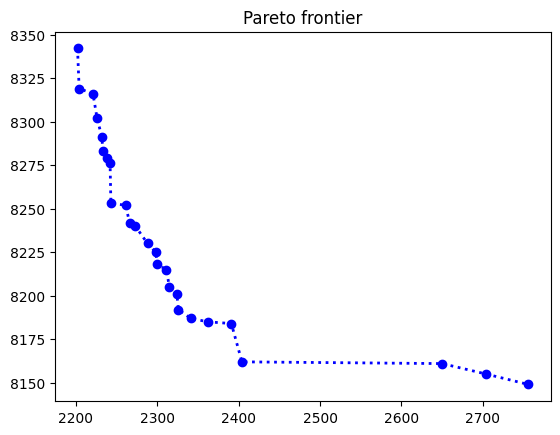

In [170]:
pareto = pareto.sort_values(by="utilA", ascending=True)
plt.title("Pareto frontier")
plt.plot(pareto["utilA"], pareto["utilB"], color='blue', linestyle=':', linewidth=2)
plt.scatter(pareto["utilA"], pareto["utilB"], color='blue')